# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [55]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


In [56]:
sns.set_style("whitegrid")

#### Load the preprocessed dataset

In [57]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [58]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

### **Bar Plot: Average Transport Expenditure by Social Class**

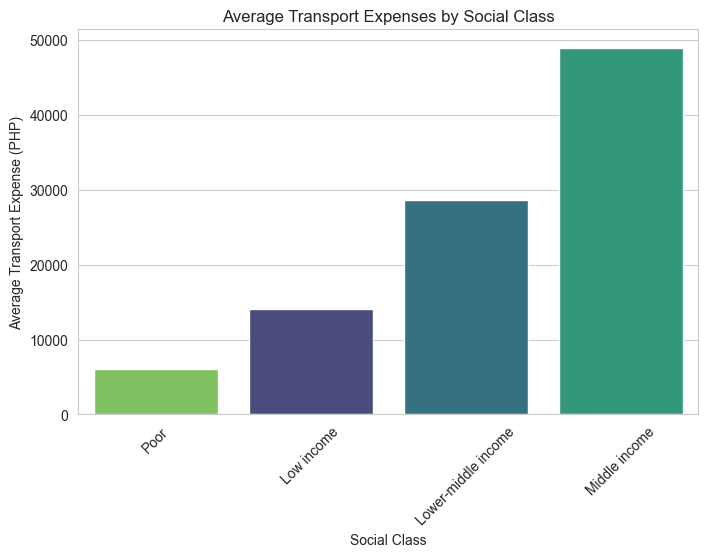

In [59]:
avg_transportation_expense = final_fies.groupby('SOCIAL_CLASS')['TRANSPORT'].mean().reset_index()
order = ['Poor', 'Low income', 'Lower-middle income', 'Middle income']

plt.figure(figsize=(8,5))
sns.barplot(
    x='SOCIAL_CLASS',
    y='TRANSPORT',
    data=avg_transportation_expense,
    palette='viridis',
    hue='SOCIAL_CLASS',
    order=order
)

plt.title('Average Transport Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Transport Expense (PHP)')
plt.xticks(rotation=45)
plt.show()

- As social class increases (in terms of income), transport expenses also increase.

- Lower-income groups most likely rely on cheaper public transportation, while higher-income individuals have more flexibility with private vehicles or premium transport options.

### **Bar Plot: Average Transport Expenses per City in NCR**

In [60]:
ncr_city_mapping = {
    3900: "City of Manila",
    7401: "City of Mandaluyong",
    7402: "City of Marikina",
    7403: "City of Pasig",
    7404: "Quezon City",
    7405: "City of San Juan",
    7501: "Caloocan City",
    7502: "City of Malabon",
    7503: "City of Navotas",
    7504: "City of Valenzuela",
    7601: "City of Las Piñas",
    7602: "City of Makati",
    7603: "City of Muntinlupa",
    7604: "City of Parañaque",
    7605: "Pasay City",
    7600: "Pateros",
    7607: "Taguig City"
}

In [61]:
final_fies_ncr = final_fies[final_fies['RPROV'].isin(ncr_city_mapping.keys())].copy()
final_fies_ncr['City'] = final_fies_ncr['RPROV'].map(ncr_city_mapping)

C:\Users\jkent\AppData\Local\Temp\ipykernel_31348\1460914176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TRANSPORT', y='City', data=avg_transport_ncr, palette='coolwarm')


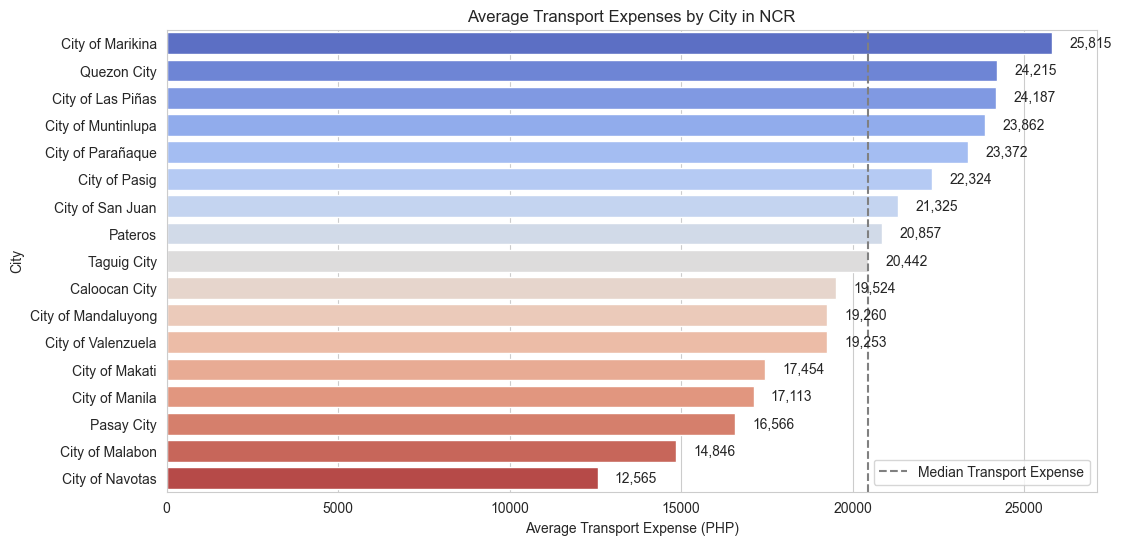

In [62]:
avg_transport_ncr = final_fies_ncr.groupby('City')['TRANSPORT'].mean().reset_index()
avg_transport_ncr = avg_transport_ncr.sort_values(by='TRANSPORT', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='TRANSPORT', y='City', data=avg_transport_ncr, palette='coolwarm')

# Add value labels
for i, v in enumerate(avg_transport_ncr['TRANSPORT']):
    ax.text(v + 500, i, f"{int(v):,}", va='center', fontsize=10)

# Add a median reference line
plt.axvline(x=avg_transport_ncr['TRANSPORT'].median(), color='gray', linestyle='--', label="Median Transport Expense")

plt.title("Average Transport Expenses by City in NCR")
plt.xlabel("Average Transport Expense (PHP)")
plt.ylabel("City")
plt.legend()
plt.show()


- Cities with higher transport expenses (Marikina, Quezon City, and Las Pinas) have the highest transport spending, possibly due to longer commutes or higher private vehicle usage

- Cities like Navotas, Malabon, and Pasay have lower transport costs, maybe due to good public transport, shorter travel distances, or the distribution of lower income classes are dominant here.

<Figure size 1400x700 with 0 Axes>

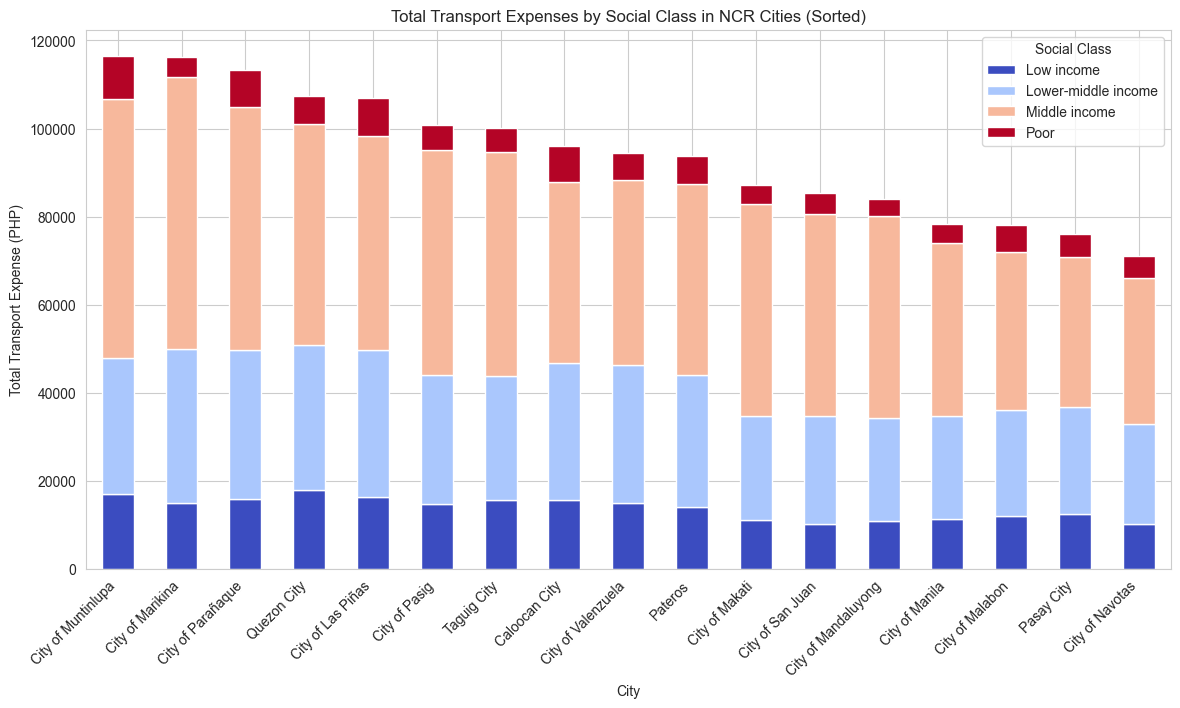

In [63]:
total_transport_social_ncr = final_fies_ncr.groupby(['City', 'SOCIAL_CLASS']) \
    ['TRANSPORT'].mean().reset_index()

df_pivot = total_transport_social_ncr.pivot(
    index="City", 
    columns="SOCIAL_CLASS", 
    values="TRANSPORT"
)

df_pivot['Total'] = df_pivot.sum(axis=1)  
df_pivot = df_pivot.sort_values(by='Total', ascending=False).drop(columns=['Total']) 

plt.figure(figsize=(14, 7))
df_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 7))

plt.title("Total Transport Expenses by Social Class in NCR Cities (Sorted)")
plt.xlabel("City")
plt.ylabel("Total Transport Expense (PHP)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Social Class", loc='upper right')

plt.show()

- In all cities, the middle-income group dominates the total transport expenses

- Lower-income and poor groups have minimal transport spending across all cities

### **Scatter Plot: Transport Expenditure vs. Total Expenditure by Social Class**

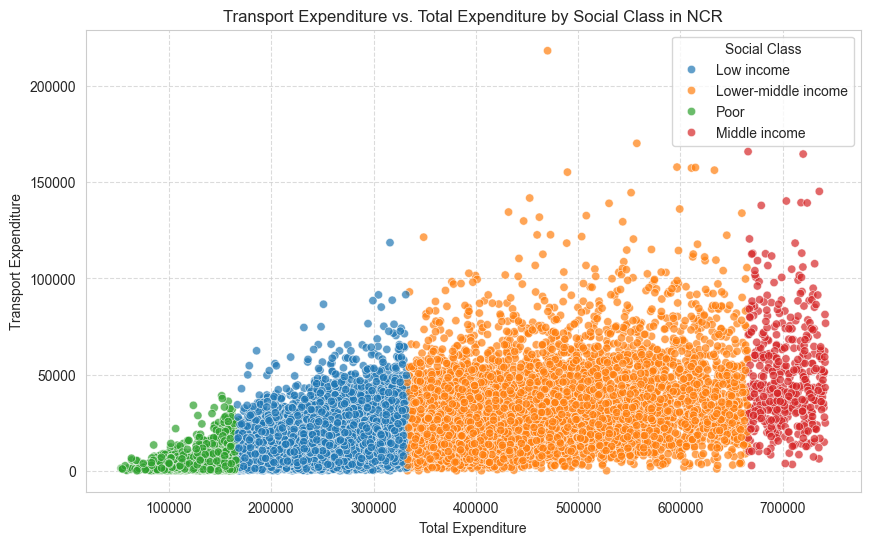

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_fies, x="TOTEX", y="TRANSPORT", hue="SOCIAL_CLASS", alpha=0.7)
plt.xlabel("Total Expenditure")
plt.ylabel("Transport Expenditure")
plt.title("Transport Expenditure vs. Total Expenditure by Social Class in NCR")
plt.legend(title="Social Class", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

- Higher-income groups allocate higher amounts to transportation as total expenditure increases.

- Poor and low-income households allocate less to transport spending, likely due to public transport reliance and/or budget constraints.

- There are some outliers in transport spending, most likely due to private vehicle ownership and its associated expenses.

### **Bar Plot: Proportion of Transport in Non-Food Expenses by Social Class**

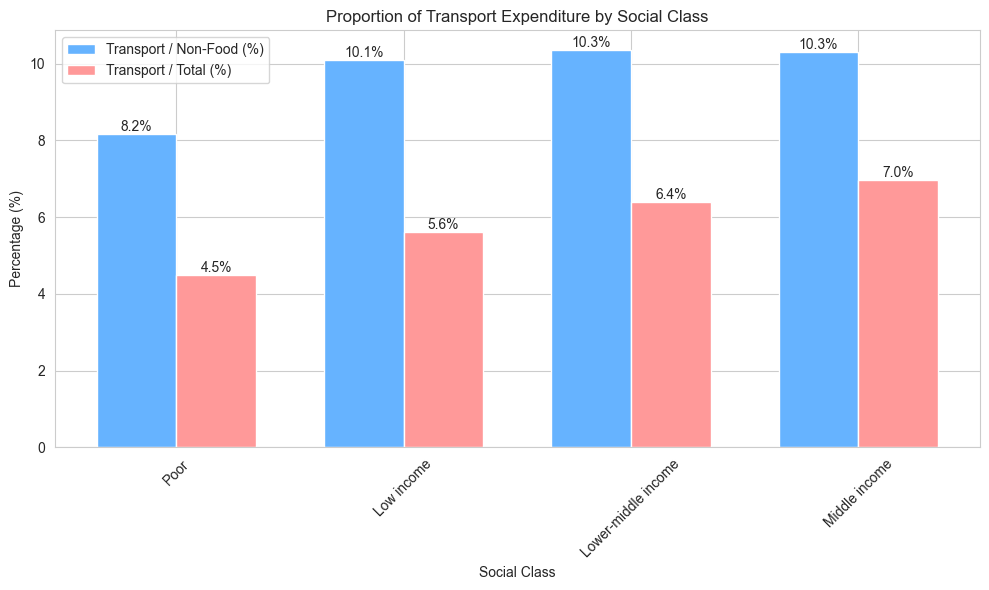

In [67]:
agg = final_fies.groupby('SOCIAL_CLASS').agg({
    'TRANSPORT': 'sum', 
    'NFOOD': 'sum', 
    'TOTEX': 'sum'
}).reindex(order)

agg['prop_nfood'] = (agg['TRANSPORT'] / agg['NFOOD']) * 100
agg['prop_totex'] = (agg['TRANSPORT'] / agg['TOTEX']) * 100

x = np.arange(len(agg))       
width = 0.35                 

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, agg['prop_nfood'], width, label='Transport / Non-Food (%)', color='#66b3ff')
bar2 = ax.bar(x + width/2, agg['prop_totex'], width, label='Transport / Total (%)', color='#ff9999')

ax.set_xlabel('Social Class')
ax.set_ylabel('Percentage (%)')
ax.set_title('Proportion of Transport Expenditure by Social Class')
ax.set_xticks(x)
ax.set_xticklabels(agg.index, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.1f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            ha='center', va='bottom', fontsize=10
        )

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()

- Transport expenses only make up a small fraction of total expenditures (6.1%)

- Transport has a slightly higher share in non-food expenses within non-food expenditures (10.2%)